<h1 style="text-align: center;">
  Engineering Economics Python Project
  <br>
  Dr. Maryam Rezapour - 1402-3
</h1>

=======================================================================================================================


<h5 style="text-align: center;">  
محمد حسین نریمانی (401104519)
-
امیر مهدی بیگدلی (401103955)
-
عرفان بیدمشکی (401103933)
-
دانیال صولت نیا (400103498)
-
علیرضا سعیدی نجات (401104179)
</h5>

=======================================================================================================================

## Library Preparations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import sklearn.linear_model as lm
import sklearn.metrics as sm
import EE_PROJECT_BEET_FUNCTIONS as EPBF

## Data Retrieval 

As the first step of our project, our data is imported from "data.xslx" and placed into a dataframe.

In [4]:
root = r'C:/Users/m-saeidinejat/Desktop/N/@ UN - Present/Engineering Economics/1 - Python Project/data'
DATA = pd.read_csv(root + '.csv')
DATA

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645115,105.739927,96,1844.0
6,1996,60150.0,283.703823,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


In [5]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Years       33 non-null     int64  
 1   Salary      30 non-null     float64
 2   material 1  33 non-null     float64
 3   material 2  33 non-null     float64
 4   demand      33 non-null     int64  
 5   price       33 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


### Null Managing

To manage our nulls, it was decided that they would be filled with the Mean of the next and previous cells' data.

In [6]:
DATA.isnull().sum()

Years         0
Salary        3
material 1    0
material 2    0
demand        0
price         0
dtype: int64

In [7]:
column_name = 'Salary'
DATA[column_name] = DATA[column_name].fillna((DATA[column_name].shift() + DATA[column_name].shift(-1)) / 2)
DATA

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645115,105.739927,96,1844.0
6,1996,60150.0,283.703823,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


# Data Prediction

## Worker Salaries

A simple linear regression method will be used to show the Salary of the workers all the way to the year 2050, by using the previous data of the Worker Salaries from the year 1990 to 2022.

In [8]:
years = np.arange(1990, 2051).reshape(-1, 1)
present_years = np.arange(1990,2023).reshape(-1,1)
future_years = np.arange(2023, 2051).reshape(-1, 1)

INPUT='Salary'
X = DATA['Years']
X = X.values.reshape(-1, 1)
Y = DATA[INPUT]

model = lm.LinearRegression()
model.fit(X,Y)
s = model.score(X,Y)

future_predictions = model.predict(future_years)
future_predictions = [round(num,2) for num in future_predictions]

y = list(Y)
f = list(future_predictions)
PREDICTED_LIST = y + f

future_df = pd.DataFrame({'Year': years.flatten(), 'Predicted_Data': PREDICTED_LIST})

future_df

,Year,Predicted_Data
0,1990,39343.00
1,1991,46205.00
2,1992,37731.00
3,1993,43525.00
4,1994,39891.00
...,...,...
56,2046,182558.65
57,2047,185213.70
58,2048,187868.76
59,2049,190523.81


### Worker Salaries Visualization & Regression Line



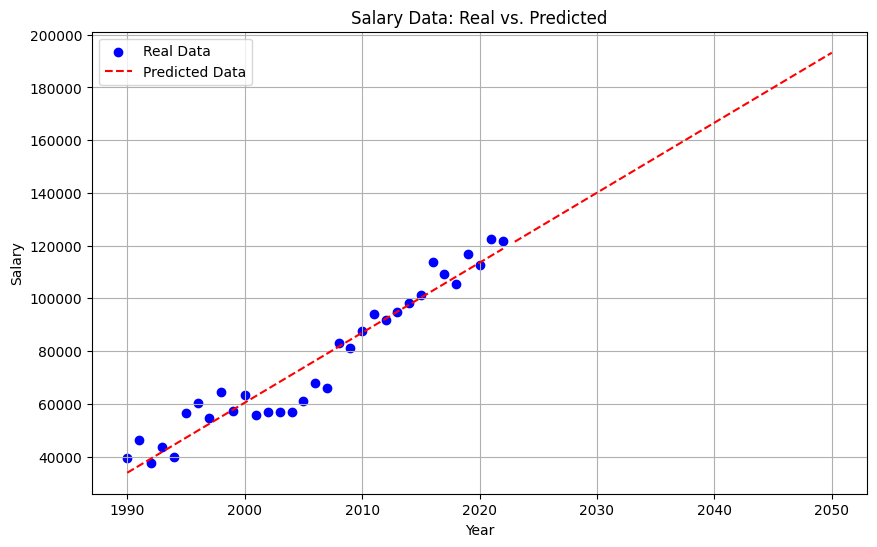

In [9]:
mplt.figure(figsize=(10, 6))
mplt.scatter(DATA['Years'], DATA[INPUT], label='Real Data', color='blue')
mplt.plot(future_years, f, label='Predicted Data', color='red', linestyle='--')
mplt.plot(present_years,model.predict(present_years),color='red',linestyle='--')
mplt.xlabel('Year')
mplt.ylabel(INPUT)
mplt.title(f'{INPUT} Data: Real vs. Predicted')
mplt.legend()
mplt.grid(True)
mplt.show()

Accurancy:

In [10]:
mae = sm.mean_absolute_error(years,future_df['Predicted_Data'])
print('Mean Absolute Error (MAE):', mae)
print("Score:",s)

Mean Absolute Error (MAE): 111507.2824590164
Score: 0.9312739842698768


## Price of Material 1

This material is imported and has a 1% inflation rate. The rate of it's increase in price is accumalated with a 5% interest rate. The prices are estimated till the year 2050.

In [11]:
Y_1 = DATA['material 1']
Current_Price = list(DATA['material 1'])[-1]

Inflation_Rate = 0.01
Interest_Rate = 0.05
Rate = 1 + Inflation_Rate + Interest_Rate

future_predictions_1 = []

for year in future_years:
    Current_Price *= Rate
    future_predictions_1.append(Current_Price)

y_1 = list(Y_1)
f_1 = list(future_predictions_1)
PREDICTED_LIST_1 = y_1 + f_1

future_df_1 = pd.DataFrame({'Year': years.flatten(), 'Predicted_Material_1': PREDICTED_LIST_1})

future_df_1


,Year,Predicted_Material_1
0,1990,200.000000
1,1991,212.000000
2,1992,224.720000
3,1993,238.203200
4,1994,252.495392
...,...,...
56,2046,5225.868176
57,2047,5539.420267
58,2048,5871.785483
59,2049,6224.092612


## Price of Material 2

The __value__ of Material 2 has a decreasing linear form after 1990. A 5% interest rate effects the price. The values of Material 2's prices will be multiplied by a factor and then a regression model will be used.

In [12]:
INPUT='material 2'
Y_2 = DATA[INPUT]
adjusted_Y_2 = DATA[INPUT] * (1 + (DATA['Years']-1990) * 0.05)

model_2 = lm.LinearRegression()
model_2.fit(X,adjusted_Y_2)
s_2 = model_2.score(X,adjusted_Y_2)

future_predictions_2 = model_2.predict(future_years)
future_predictions_2 = [round(num,2) for num in future_predictions_2]

y = list(Y_2)
f_2 = list(future_predictions_2)
PREDICTED_LIST_2 = y + f_2

future_df_2 = pd.DataFrame({'Year': years.flatten(), 'Predicted_Data': PREDICTED_LIST_2})

future_df_2

,Year,Predicted_Data
0,1990,89.600000
1,1991,92.662500
2,1992,95.807250
3,1993,99.034819
4,1994,102.345626
...,...,...
56,2046,898.050000
57,2047,913.220000
58,2048,928.400000
59,2049,943.580000


### Material 2's Price Visualization & Regression Line

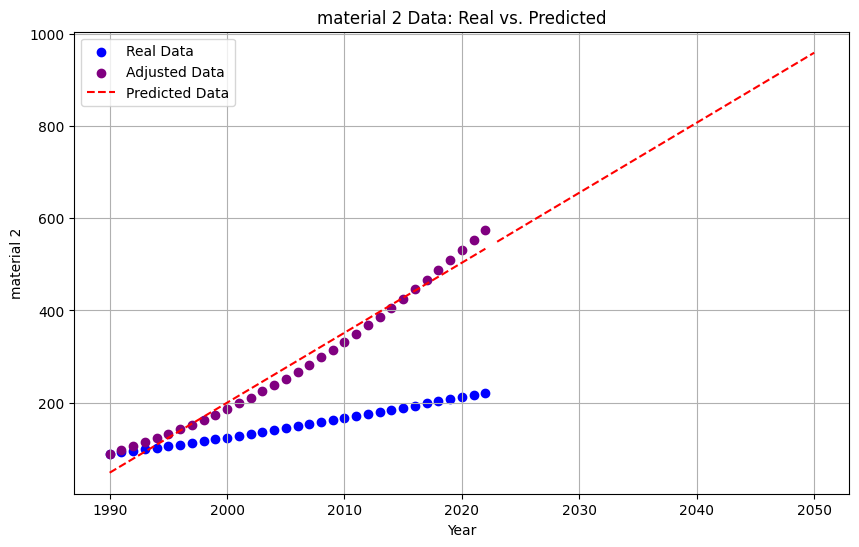

In [13]:
mplt.figure(figsize=(10, 6))
mplt.scatter(DATA['Years'], DATA[INPUT], label='Real Data', color='blue')
mplt.scatter(DATA['Years'], adjusted_Y_2, label='Adjusted Data', color='purple')
mplt.plot(future_years, f_2, label='Predicted Data', color='red', linestyle='--')
mplt.plot(present_years,model_2.predict(present_years),color='red',linestyle='--')
mplt.xlabel('Year')
mplt.ylabel(INPUT)
mplt.title(f'{INPUT} Data: Real vs. Predicted')
mplt.legend()
mplt.grid(True)
mplt.show()

Accurancy:

In [14]:
mae = sm.mean_absolute_error(years,future_df_2['Predicted_Data'])
print('Mean Absolute Error (MAE):', mae)
print("Score:",s_2)

Mean Absolute Error (MAE): 1592.238839677869
Score: 0.9798189695995044


## Demand 

The demand of each product is a function as shown:
#### e ^ (-n/50) ; n = year - 1990

A regression model with the new data will be used to predict demand to the year 2050.

In [15]:
e = float(np.e)
def equation(n):
    n = n - 1990
    return 103 * e ** (-n/50)

In [16]:
INPUT='demand'
Y_3 = DATA[INPUT]
adjusted_Y_3 = [float(equation(n)) for n in present_years]

print(adjusted_Y_3)

model_3 = lm.LinearRegression()
model_3.fit(X,adjusted_Y_3)
s_3 = model_3.score(X,adjusted_Y_3)

future_predictions_3 = model_3.predict(future_years)
future_predictions_3 = [round(num,2) for num in future_predictions_3]

y = list(Y_3)
f_3 = list(future_predictions_3)
PREDICTED_LIST_3 = y + f_3

future_df_3 = pd.DataFrame({'Year': years.flatten(), 'Predicted_Data': PREDICTED_LIST_3})

future_df_3

[103.0, 100.96046335059579, 98.96131223268928, 97.00174695917762, 95.08098367782348, 93.19825405770383, 91.35280498186722, 89.543898246077, 87.77081026351976, 86.03283177536102, 84.32926756703213, 82.65943619013528, 81.02266968985501, 79.41831333776733, 77.84572536993973, 76.30427673021694, 74.79335081859017, 73.3123432445488, 71.8606615853162, 70.43772514887264, 69.04296474167086, 67.67582244095085, 66.33575137156356, 65.02221548721337, 63.734689356032504, 62.47265795040124, 61.23561644093002, 60.02306999452093, 58.83453357642793, 57.66953175623641, 56.52759851768473, 55.40827707225147, 54.311119676434004]


C:\Users\m-saeidinejat\AppData\Local\Temp\ipykernel_6604\3514830132.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  adjusted_Y_3 = [float(equation(n)) for n in present_years]


,Year,Predicted_Data
0,1990,103.00
1,1991,104.00
2,1992,101.00
3,1993,99.00
4,1994,95.00
...,...,...
56,2046,15.67
57,2047,14.16
58,2048,12.65
59,2049,11.13


### Demand Visualization & Regression Line



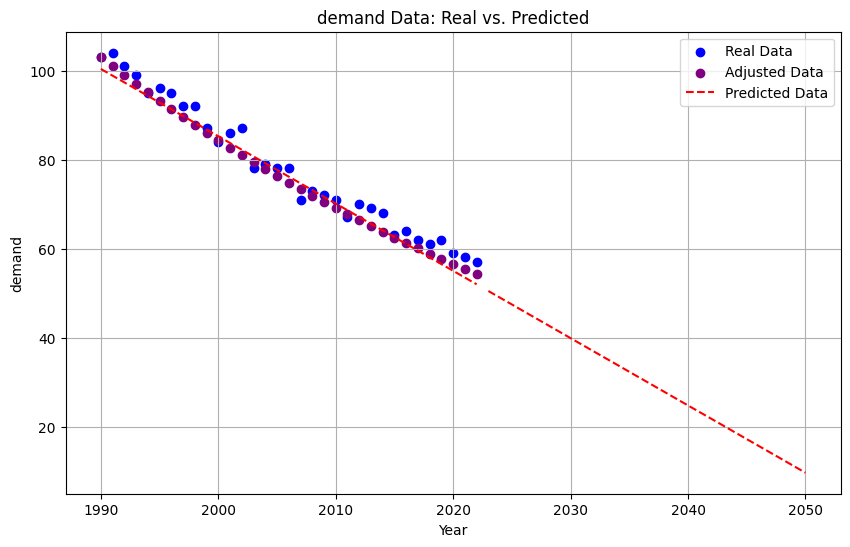

In [17]:
mplt.figure(figsize=(10, 6))
mplt.scatter(DATA['Years'], DATA[INPUT], label='Real Data', color='blue')
mplt.scatter(DATA['Years'], adjusted_Y_3, label='Adjusted Data', color='purple')
mplt.plot(future_years, f_3, label='Predicted Data', color='red', linestyle='--')
mplt.plot(present_years,model_3.predict(present_years),color='red',linestyle='--')
mplt.xlabel('Year')
mplt.ylabel(INPUT)
mplt.title(f'{INPUT} Data: Real vs. Predicted')
mplt.legend()
mplt.grid(True)
mplt.show()

Accurancy:

In [18]:
mae = sm.mean_absolute_error(years,future_df_3['Predicted_Data'])
print('Mean Absolute Error (MAE):', mae)
print("Score:",s_3)

Mean Absolute Error (MAE): 1963.9018032786885
Score: 0.9928409806830246


## Product Price

A simple linear regression method will be used to show the price of the final product all the way to the year 2050, by using the previous data of the Product's Prices from the year 1990 to 2022.



In [19]:
INPUT='price'
Y_4 = DATA[INPUT]

model_4 = lm.LinearRegression()
model_4.fit(X,Y_4)
s_4 = model_4.score(X,Y_4)

future_predictions_4 = model_4.predict(future_years)
future_predictions_4 = [round(num,2) for num in future_predictions_4]

y = list(Y_4)
f_4 = list(future_predictions_4)
PREDICTED_LIST_4 = y + f_4

future_df_4 = pd.DataFrame({'Year': years.flatten(), 'Predicted_Data': PREDICTED_LIST_4})

future_df_4

,Year,Predicted_Data
0,1990,1200.0
1,1991,1375.0
2,1992,1451.0
3,1993,1593.0
4,1994,1718.5
...,...,...
56,2046,8244.5
57,2047,8370.0
58,2048,8495.5
59,2049,8621.0


### Product Price Visualization & Regression Line



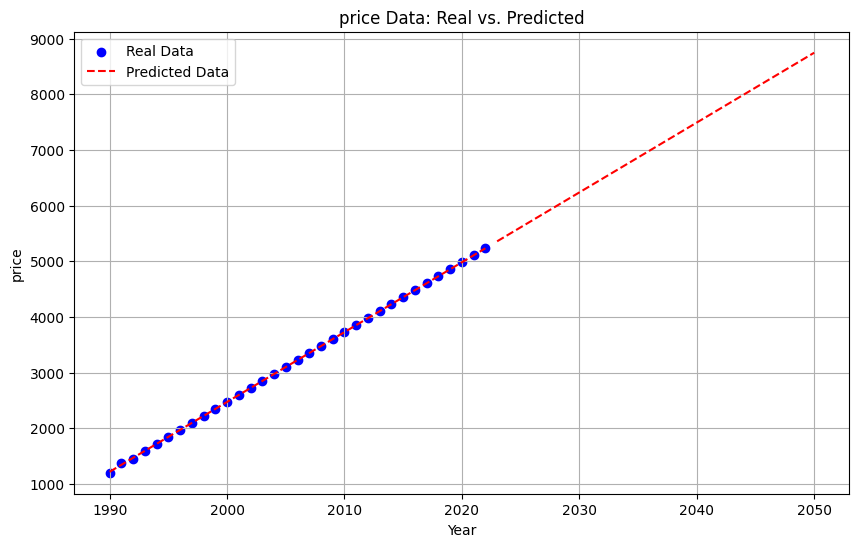

In [20]:
mplt.figure(figsize=(10, 6))
mplt.scatter(DATA['Years'], DATA[INPUT], label='Real Data', color='blue')
mplt.plot(future_years, f_4, label='Predicted Data', color='red', linestyle='--')
mplt.plot(present_years,model_4.predict(present_years),color='red',linestyle='--')
mplt.xlabel('Year')
mplt.ylabel(INPUT)
mplt.title(f'{INPUT} Data: Real vs. Predicted')
mplt.legend()
mplt.grid(True)
mplt.show()

Accurancy:

In [21]:
mae = sm.mean_absolute_error(years,future_df_4['Predicted_Data'])
print('Mean Absolute Error (MAE):', mae)
print("Score:",s_4)

Mean Absolute Error (MAE): 3053.3032786885246
Score: 0.9999653378861689


## Full Dataframe

In [22]:
full_df = pd.DataFrame({'Year': years.flatten(), 'Salary': PREDICTED_LIST, 'material_1':PREDICTED_LIST_1, 'material_2':PREDICTED_LIST_2,'demand':PREDICTED_LIST_3,'price': PREDICTED_LIST_4})
full_df

,Year,Salary,material_1,material_2,demand,price
0,1990,39343.00,200.000000,89.600000,103.00,1200.0
1,1991,46205.00,212.000000,92.662500,104.00,1375.0
2,1992,37731.00,224.720000,95.807250,101.00,1451.0
3,1993,43525.00,238.203200,99.034819,99.00,1593.0
4,1994,39891.00,252.495392,102.345626,95.00,1718.5
...,...,...,...,...,...,...
56,2046,182558.65,5225.868176,898.050000,15.67,8244.5
57,2047,185213.70,5539.420267,913.220000,14.16,8370.0
58,2048,187868.76,5871.785483,928.400000,12.65,8495.5
59,2049,190523.81,6224.092612,943.580000,11.13,8621.0


## Requirements :

### 1) Predict until which year this company will be profitable.

Demand = D ; D > 60 : 18% OFF | 60 >= D > 40 : 10% OFF | 40 >= D > 20 : 5% OFF | 20 >= D : 0% OFF

In [29]:
discount_df = full_df.copy()

discount_df.loc[discount_df['demand'] > 60 , 'price'] *= 0.82
discount_df.loc[(discount_df['demand'] > 40) & (discount_df['demand'] <= 60), 'price'] *= 0.9
discount_df.loc[(discount_df['demand'] > 20) & (discount_df['demand'] <= 40), 'price'] *= 0.95

discount_df

,Year,Salary,material_1,material_2,demand,price
0,1990,39343.00,200.000000,89.600000,103.00,984.00
1,1991,46205.00,212.000000,92.662500,104.00,1127.50
2,1992,37731.00,224.720000,95.807250,101.00,1189.82
3,1993,43525.00,238.203200,99.034819,99.00,1306.26
4,1994,39891.00,252.495392,102.345626,95.00,1409.17
...,...,...,...,...,...,...
56,2046,182558.65,5225.868176,898.050000,15.67,8244.50
57,2047,185213.70,5539.420267,913.220000,14.16,8370.00
58,2048,187868.76,5871.785483,928.400000,12.65,8495.50
59,2049,190523.81,6224.092612,943.580000,11.13,8621.00
